### 타이타닉 생존자 데이터 전처리

- 타이타닉은 세계에서 가장 유명한 배 중 하나로
- 타이타닉호의 침몰은 영화 등 다양한 콘텐츠로 여러 사람들에게 전달되었다.
- 그런 타이타닉호의 승객 데이터를 활용해
- 승객 정보를 입력해 이 승객이 타이타닉 호에서 생존할 수 있을지 없을지를 분류하는 AI 모델 제작을 계획해보자
- 이런 AI를 만들기 위해 데이터를 어떻게 처리해야 할까?

In [ ]:
#타이타닉 호 2200명의 탑승자중 700명만 생존
#과연 생존한 사람들은 어떤 사람들이고?
#사망한 사람들은 어떤 사람들일까?

import pandas as pd

def read_csv(file_path):
    try:
        # UTF-8 인코딩으로 CSV 파일 읽기
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        # 예외 발생 시 CP949 인코딩으로 재시도
        df = pd.read_csv(file_path, encoding='cp949')

    return df

# 파일 경로를 지정하세요
file_path = ''

# 데이터프레임 읽기 및 저장
ti_df = read_csv(file_path)

# 데이터 프레임의 형태 확인 (전체 정보, 앞에서 5개, 값 분포 확인)
display(ti_df.info())
display(ti_df.head())
display(ti_df.describe())
display(ti_df.isnull().sum())


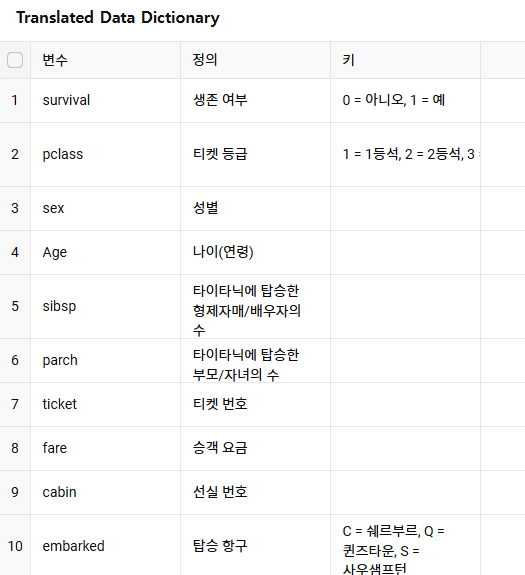

### 데이터를 어떻게 처리해야 할까?

- 결측치가 없는 데이터?  :
- 결측치가 많은 데이터? :
- 결측치가 얼마 되지 않은 데이터? :
- 각각 어떻게 처리 해야 할까? :

In [ ]:
#결측치가 많은 속성 통째로! 제거

ti_df = ti_df.drop(columns=[''])
display(ti_df.info())

#코랩 노트북에서 실행 결과는 계속 누적된다는 걸 기억하자!

In [ ]:
#결측치가 얼마 되지 않는 속성의 행(레코드) 제거
#속성을 통째로 제거하는게 아니라 그 행 정보만 제거한다
#왜? 우리의 목적은 :


ti_df = ti_df.dropna(subset=[''])
display(ti_df.info())


In [ ]:
#나이 속성의 경우는 어떻게 처리해야 할까?
#결측치가 적지는 않지만
#생존에 영향을 주는 데이터일까? 주지 않는 데이터일까?
#어떻게 처리해야 할까? :





In [ ]:
ti_df = ti_df.dropna(subset=[''])
display(ti_df.info())

### 이번에는 특정 속성에 따른 정보를 확인해보자

- 특정 속성이 어떤 값이냐에 따라 다른 속성의 값이 어떻게 변화하는지를 파악해야 할 때가 있다.
- 가설1 -> 문해력이 뛰어난 학생은 다른 과목의 성적도 좋을 것이다?. 어떻게 확인할 수 있을까?
- 가설2 -> 정시 합격 학생들의 대학에서의 성취가 수시 합격 학생들의 대학에서의 성취보다 높을 것이다.

In [ ]:
#Pclass 선실 등급에 따른 다른 정보의 분포(평균)으로 확인해보기


num_df = ti_df.select_dtypes(include='number')
p_temp = num_df.groupby('Pclass').mean() #선실 등급에 따른 다른 값들의 평균 계산
display(p_temp)


In [ ]:
#선실 등급에 따른 생존율 시각화

import plotly.express as px

# 데이터 설정

# 막대 그래프 생성
fig = px.bar(x=['1등','2등','3등'], y=p_temp['Survived'], title='칸 등급에 따른 생존율',
             labels={'x': '칸 등급', 'y': '생존율'})

# 그래프 크기 설정 - 너비와 높이
fig.update_layout(
    width=800,   # 그래프 너비
    height=600   # 그래프 높이
)

# 그래프 표시
fig.show()


In [ ]:
#나이(수치형 데이터)에 따른 다른 정보의 분포(평균)으로 확인해보기


num_df = ti_df.select_dtypes(include='number')
p_temp = num_df.groupby('').mean() #나이에 다른 값들의 평균 계산
display(p_temp)


In [ ]:
#나이를 8개의 그룹으로 나누어 범주화하기

num_df = ti_df.select_dtypes(include='number')
num_df['AgeBand'] = pd.cut(num_df['Age'],bins=)#Age를 8개의 그룹으로 범주화하여 새로운 속성 생성
p_temp = num_df.groupby('AgeBand').mean()
display(p_temp)

In [ ]:
#나이 구간 별 생존률 시각화 코드


import plotly.express as px

# 데이터 설정

# 막대 그래프 생성
fig = px.bar(x=[f"{i}구간" for i in range(1, 9)], y=p_temp['Survived'], title='나이 구간에 따른 생존율',
             labels={'x': '나이 구간', 'y': '생존율'})

# 그래프 크기 설정 - 너비와 높이
fig.update_layout(
    width=800,   # 그래프 너비
    height=600   # 그래프 높이
)

fig.show()

In [ ]:
#데이터 상관도 분석 결과
# 상관행렬 계산


num_df = ti_df.select_dtypes(include='number')

correlation_matrix = num_df.corr()

# Plotly를 사용한 상관도 시각화
fig = px.imshow(correlation_matrix,
                text_auto=True,
                color_continuous_scale='Viridis',
                title='타이타닉 생존자 상관행렬')
fig.show()

In [16]:
#처리가 끝난 데이터 파일로 저장하기

ti_df.to_csv('',encoding='utf-8-sig')

In [ ]:
#위 코드를 활용해서 내가 정한 특정 속성에 따른 분포를 확인해보자

num_df = ti_df.select_dtypes(include='number')
p_temp = num_df.groupby('').mean() #'' 안에 그룹으로 묶고 싶은 속성 입력하기
display(p_temp)

In [ ]:
#내가 고른 속성에 따른 시각화

import plotly.express as px

# 데이터 설정

# 막대 그래프 생성
fig = px.bar(x=[f"{i}" for i in range(, )], y=p_temp[''], title='',
             labels={'x': '', 'y': ''})

# 그래프 크기 설정 - 너비와 높이
fig.update_layout(
    width=800,   # 그래프 너비
    height=600   # 그래프 높이
)

fig.show()